In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
%matplotlib inline

In [58]:
#import dataset
df=pd.read_csv("supermarket_sales.csv")
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [6]:
df.shape

(1000, 17)

In [7]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


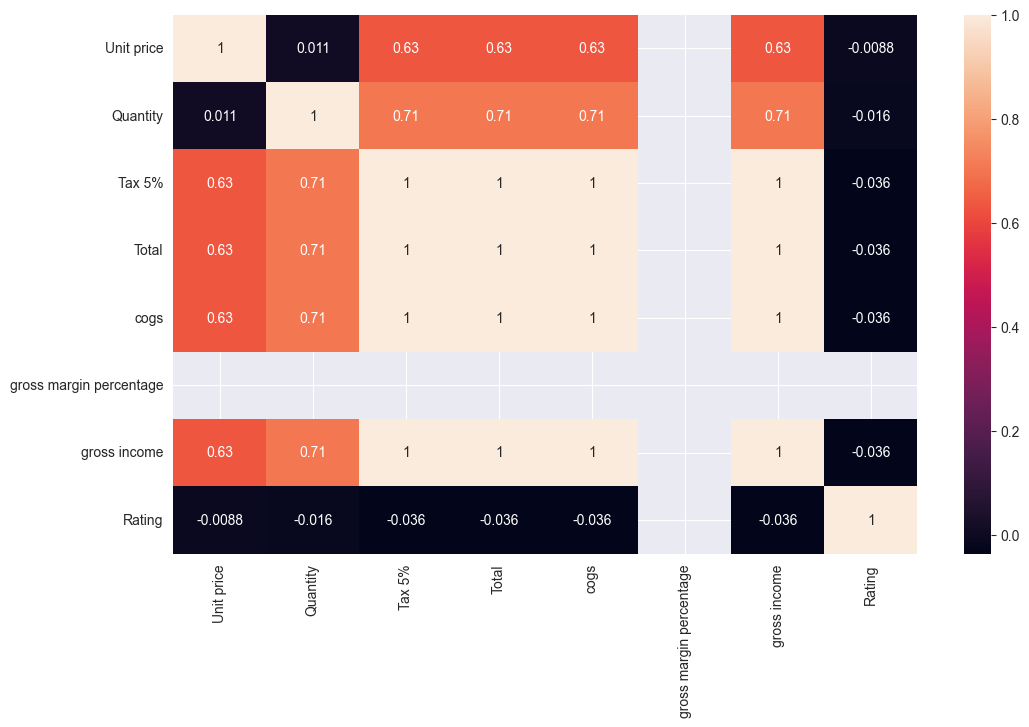

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
plt.figure(figsize=(12,7))
corrMat=df.corr(numeric_only=True)
sns.heatmap(corrMat, annot=True)
plt.show()

In [10]:
df["City"].unique()

array(['Yangon', 'Naypyitaw', 'Mandalay'], dtype=object)

In [12]:
df['City'].value_counts()

City
Yangon       340
Mandalay     332
Naypyitaw    328
Name: count, dtype: int64

Text(0.5, 1.0, 'Customer count')

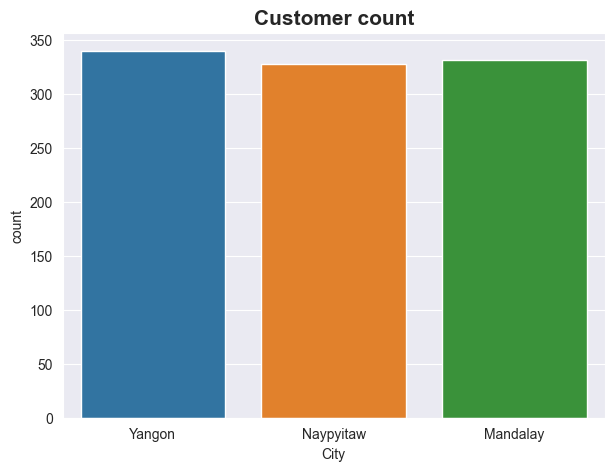

In [14]:
plt.figure(figsize=(7,5))
sns.countplot(x='City',data=df).set_title("Customer count", fontsize=15,fontdict={"weight":"bold"})

In [15]:
total_sales=df.groupby("City").sum()
total_sales['Total'].sort_values(ascending=False)

City
Naypyitaw    110568.7065
Yangon       106200.3705
Mandalay     106197.6720
Name: Total, dtype: float64

Text(0.5, 1.0, 'Total_sales')

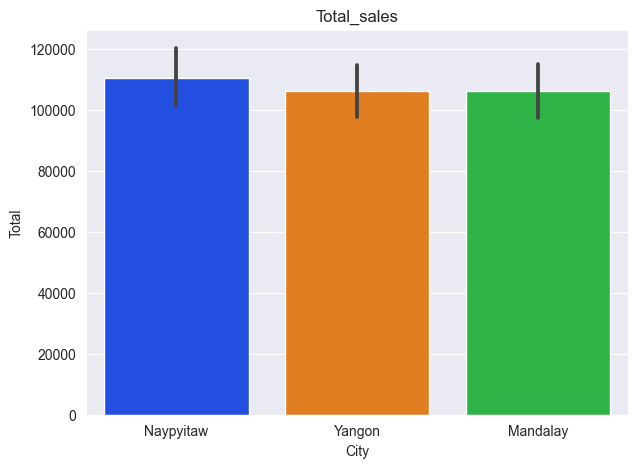

In [21]:
plt.figure(figsize=(7,5))
sns.barplot(x="City",y='Total',data=df,order=["Naypyitaw","Yangon","Mandalay"],palette='bright',estimator=sum).set_title('Total_sales')

In [22]:
total_quantity=df.groupby("City").sum()
total_quantity['Quantity'].sort_values(ascending=False)

City
Yangon       1859
Naypyitaw    1831
Mandalay     1820
Name: Quantity, dtype: int64

Text(0.5, 1.0, 'Quantity sales')

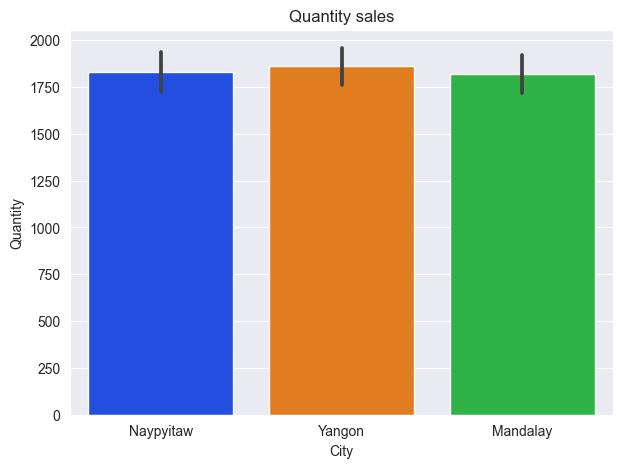

In [25]:
plt.figure(figsize=(7,5))
sns.barplot(x="City",y='Quantity',data=df,order=["Naypyitaw","Yangon","Mandalay"],palette='bright',estimator=sum).set_title("Quantity sales")

In [26]:
df["Customer type"].unique()

array(['Member', 'Normal'], dtype=object)

In [27]:
df.groupby('Customer type').size()

Customer type
Member    501
Normal    499
dtype: int64

<Axes: xlabel='Customer type', ylabel='count'>

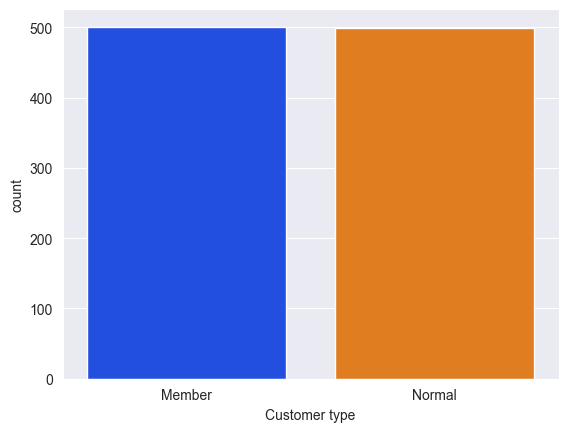

In [29]:
sns.countplot(x='Customer type',data=df,order=["Member","Normal"],palette='bright')

In [30]:
# Gender of Customer
df.groupby('Gender').size()

Gender
Female    501
Male      499
dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

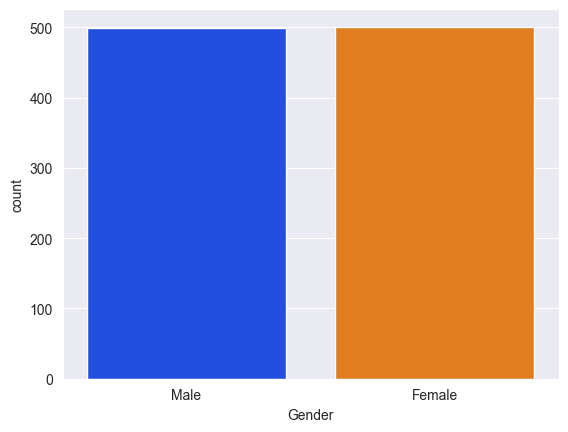

In [31]:
sns.countplot(x='Gender',data=df,order=['Male','Female'],palette='bright')

In [32]:
# Payment method
df['Payment'].unique()

array(['Ewallet', 'Cash', 'Credit card'], dtype=object)

In [34]:
df.groupby('Payment').size()

Payment
Cash           344
Credit card    311
Ewallet        345
dtype: int64

Text(0.5, 1.0, 'Payment Method')

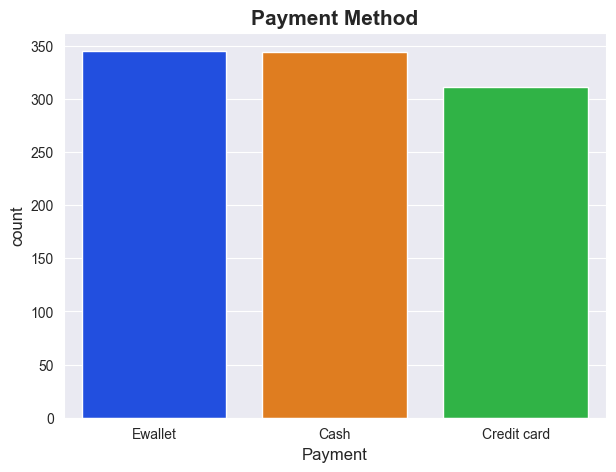

In [37]:
plt.figure(figsize=(7,5))
plt.xlabel("Payment",fontsize=12)
plt.ylabel("Count",fontsize=12)
sns.countplot(x='Payment',data=df,palette='bright').set_title("Payment Method",fontsize=15,fontdict={"weight": "bold"}) 

In [38]:
#Each product line
df['Product line'].unique()

array(['Health and beauty', 'Electronic accessories',
       'Home and lifestyle', 'Sports and travel', 'Food and beverages',
       'Fashion accessories'], dtype=object)

In [40]:
# Total sell
df.groupby("Product line").sum()
product["Total"].sort_values(ascending=False)

Product line
Food and beverages        56144.8440
Sports and travel         55122.8265
Electronic accessories    54337.5315
Fashion accessories       54305.8950
Home and lifestyle        53861.9130
Health and beauty         49193.7390
Name: Total, dtype: float64

Text(0.5, 1.0, 'Total Sales')

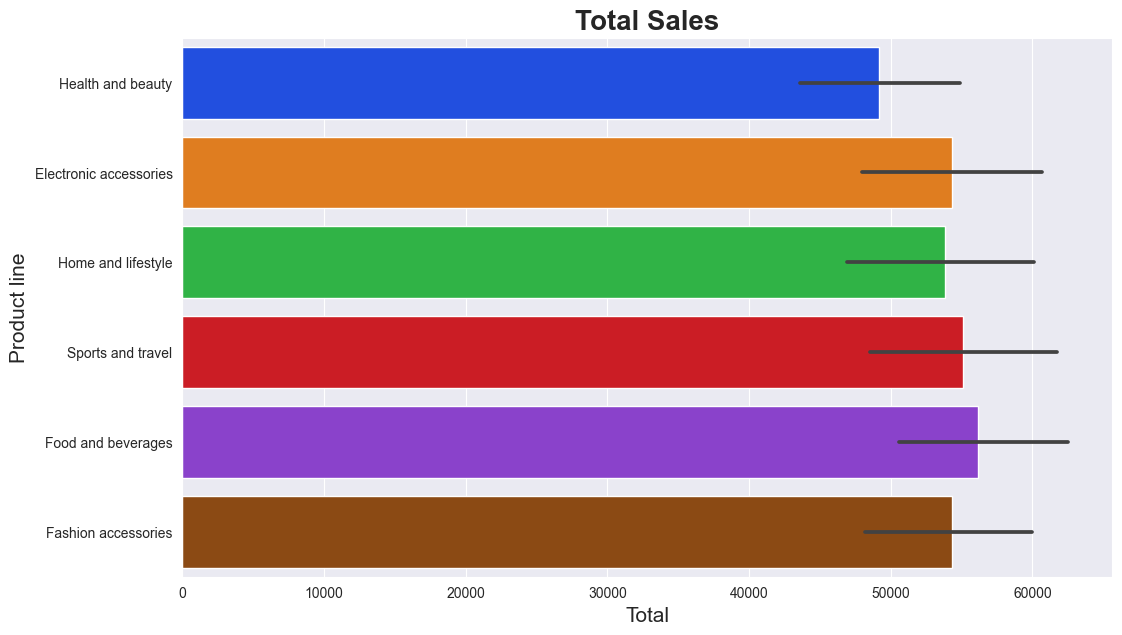

In [42]:
plt.figure(figsize=(12,7))
plt.xlabel("Total",fontsize=15)
plt.ylabel("Product line",fontsize=15)
sns.barplot(x='Total',y="Product line",data=df,palette='bright',estimator=sum).set_title('Total Sales',fontsize=20,fontdict={"weight": "bold"})

In [44]:
# Amount of selling quality
product["Quantity"].sort_values(ascending=False)

Product line
Electronic accessories    971
Food and beverages        952
Sports and travel         920
Home and lifestyle        911
Fashion accessories       902
Health and beauty         854
Name: Quantity, dtype: int64

Text(0.5, 1.0, 'Quantity Sales')

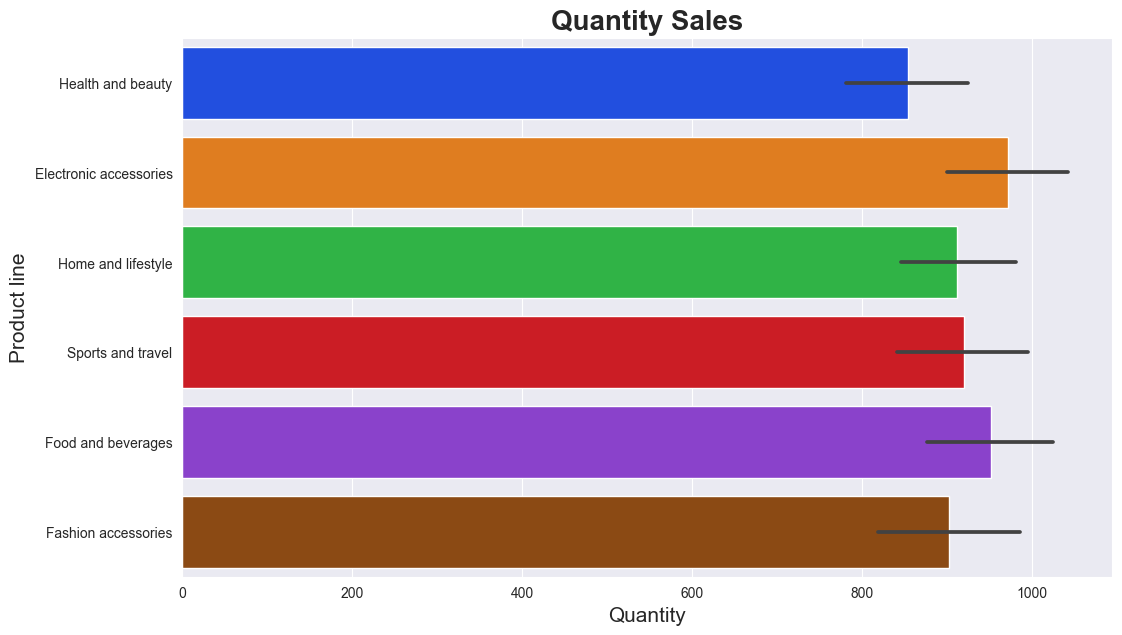

In [45]:
plt.figure(figsize=(12,7))
plt.xlabel("Total",fontsize=15)
plt.ylabel("Product line",fontsize=15)
sns.barplot(x='Quantity',y="Product line",data=df,palette='bright',estimator=sum).set_title('Quantity Sales',fontsize=20,fontdict={"weight":"bold"})

In [46]:
# Gross income
product["gross income"].sort_values(ascending=False)

Product line
Food and beverages        2673.5640
Sports and travel         2624.8965
Electronic accessories    2587.5015
Fashion accessories       2585.9950
Home and lifestyle        2564.8530
Health and beauty         2342.5590
Name: gross income, dtype: float64

In [47]:
df["gross margin percentage"].unique()

array([4.76190476])

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
%matplotlib inline


In [9]:
df=pd.read_csv("supermarket_sales.csv")
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [10]:
df["Hour"]=df["Time"].str[0:2]

In [11]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Hour
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,13
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,10
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,13
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,20
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,10


In [12]:
df["Hour"].unique()

array(['13', '10', '20', '18', '14', '11', '17', '16', '19', '15', '12'],
      dtype=object)

In [13]:
df['Hour'].dtype

dtype('O')

In [14]:
df['Hour']=pd.to_numeric(df['Hour'])
df['Hour'].dtype

dtype('int64')

In [15]:
hours=df.groupby("Hour").sum()
hours["Total"]

Hour
10    31421.4810
11    30377.3295
12    26065.8825
13    34723.2270
14    30828.3990
15    31179.5085
16    25226.3235
17    24445.2180
18    26030.3400
19    39699.5130
20    22969.5270
Name: Total, dtype: float64

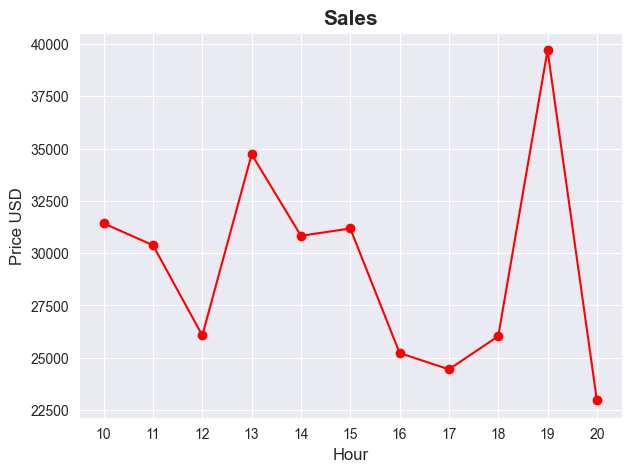

In [16]:
Hour=range(10,21)

x=Hour
y=hours['Total']
plt.figure(figsize=(7,5))
plt.title('Sales',fontsize=15,fontdict={"weight": "bold"})
plt.plot(x,y,color='r',marker='o',markerfacecolor='r')
plt.xticks(Hour)
plt.xlabel("Hour",fontsize=12)
plt.ylabel("Price USD",fontsize=12)
plt.grid(True)

plt.show()

In [17]:
hours=df.groupby("Hour").sum()
hours["Quantity"]

Hour
10    525
11    513
12    501
13    585
14    495
15    530
16    420
17    415
18    475
19    649
20    402
Name: Quantity, dtype: int64

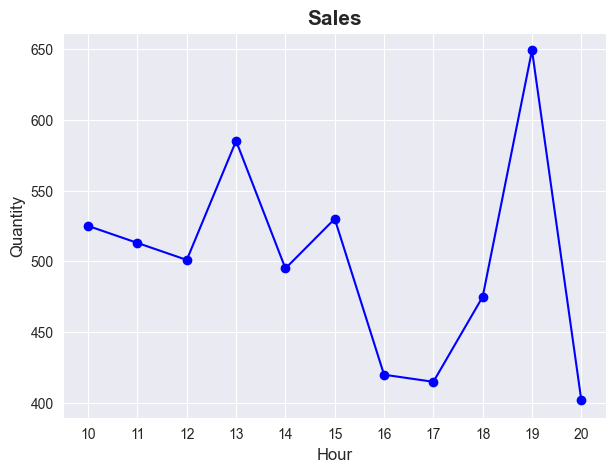

In [18]:
Hour=range(10,21)

x=Hour
y=hours['Quantity']

plt.figure(figsize=(7,5))
plt.title('Sales',fontsize=15,fontdict={"weight": "bold"})
plt.plot(x,y,color='b',marker='o',markerfacecolor='b')
plt.xticks(Hour)
plt.xlabel("Hour",fontsize=12)
plt.ylabel("Quantity",fontsize=12)
plt.grid(True)

plt.show()

In [19]:
# RAting
df['Rating'].unique()

array([ 9.1,  9.6,  7.4,  8.4,  5.3,  4.1,  5.8,  8. ,  7.2,  5.9,  4.5,
        6.8,  7.1,  8.2,  5.7,  4.6,  6.9,  8.6,  4.4,  4.8,  5.1,  9.9,
        6. ,  8.5,  6.7,  7.7,  7.5,  7. ,  4.7,  7.6,  7.9,  6.3,  5.6,
        9.5,  8.1,  6.5,  6.1,  6.6,  5.4,  9.3, 10. ,  6.4,  4.3,  4. ,
        8.7,  9.4,  5.5,  8.3,  7.3,  4.9,  4.2,  9.2,  7.8,  5.2,  9. ,
        8.8,  6.2,  9.8,  9.7,  5. ,  8.9])

Text(0.5, 1.0, 'Rating-Count')

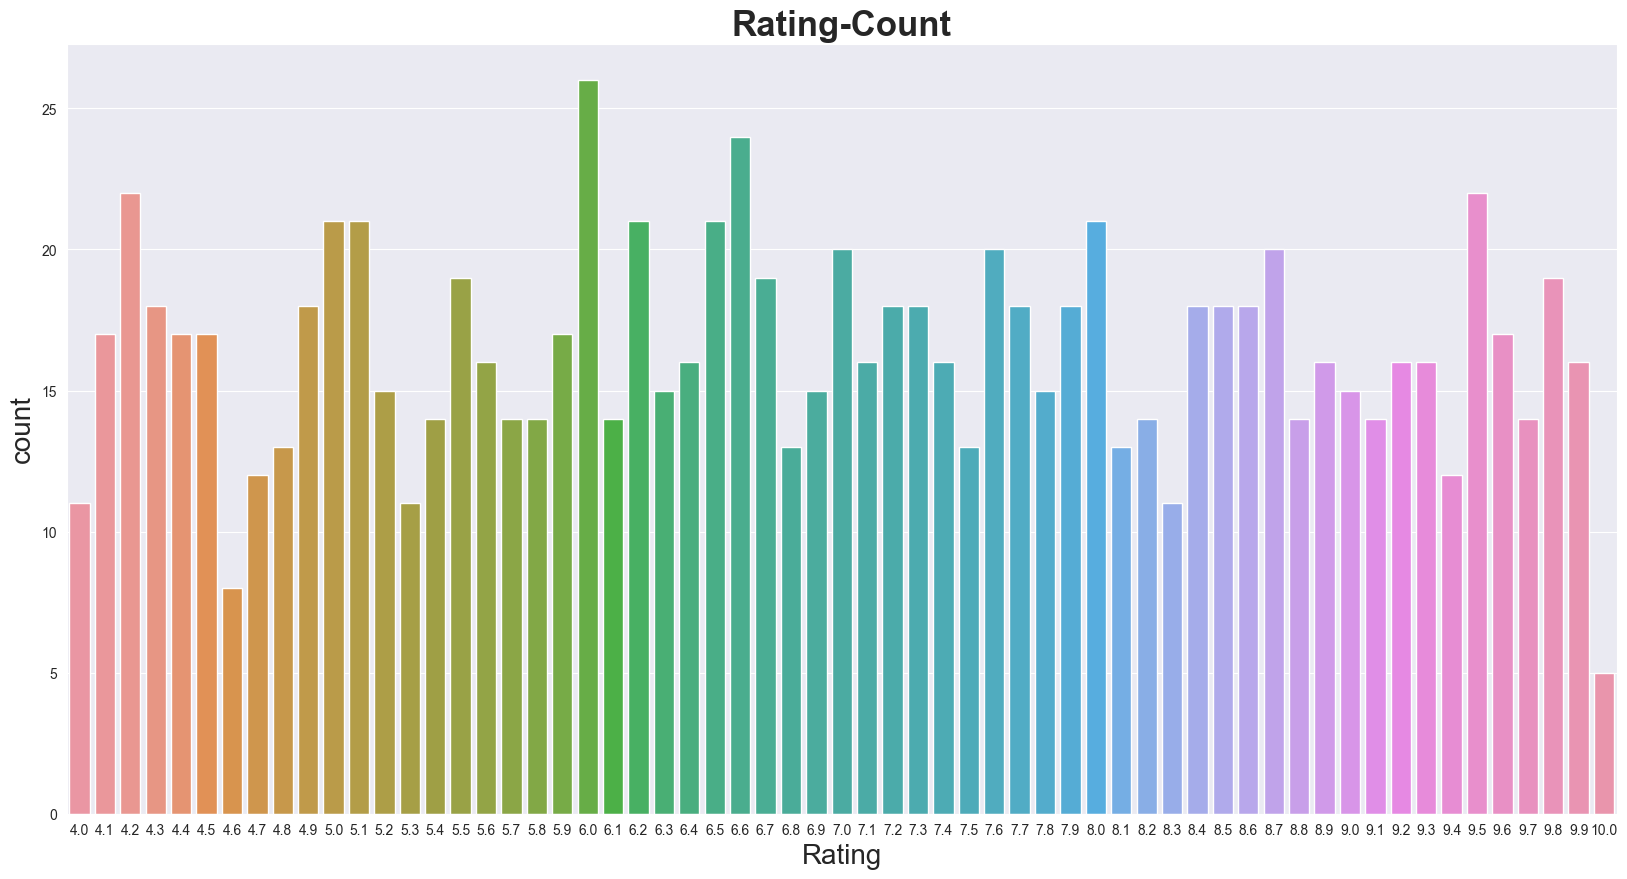

In [20]:
plt.figure(figsize=(20,10))
plt.xlabel("Rating",fontsize=20)
plt.ylabel("Count",fontsize=20)
sns.countplot(x=df["Rating"],data=df).set_title('Rating-Count',fontsize=25,fontdict={"weight": "bold"})

In [21]:
# converting 'Rating' from float to int

df['Rating'] = df['Rating'].astype('int')
df['Rating'].dtype

dtype('int32')

In [22]:
df['Rating'].unique()

array([ 9,  7,  8,  5,  4,  6, 10])

In [23]:
df['Rating'].value_counts()

Rating
6     184
7     172
8     163
5     162
9     161
4     153
10      5
Name: count, dtype: int64

Text(0.5, 1.0, 'Rating-Count')

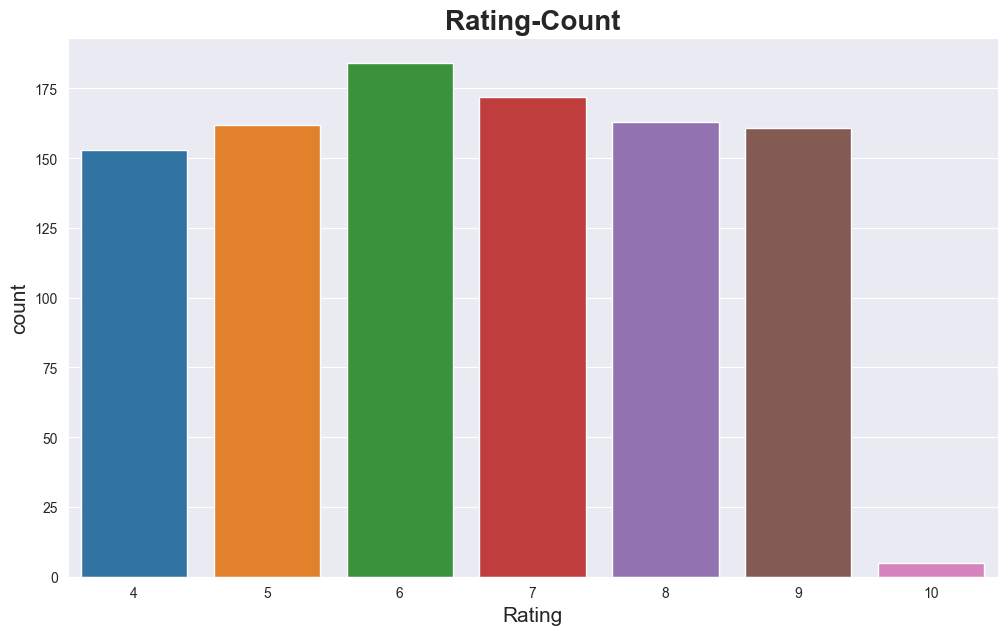

In [24]:
plt.figure(figsize=(12,7))
plt.xlabel("Rating",fontsize=15)
plt.ylabel("Count",fontsize=15)
sns.countplot(x=df["Rating"],data=df).set_title('Rating-Count',fontsize=20,fontdict={"weight": "bold"})

In [26]:
# Rating on each product line
df['Rating'].groupby(df['Product line']).median().sort_values(ascending=False)

Product line
Food and beverages        7.0
Health and beauty         7.0
Home and lifestyle        7.0
Fashion accessories       6.5
Electronic accessories    6.0
Sports and travel         6.0
Name: Rating, dtype: float64

Text(0.5, 1.0, 'Rating-Product line')

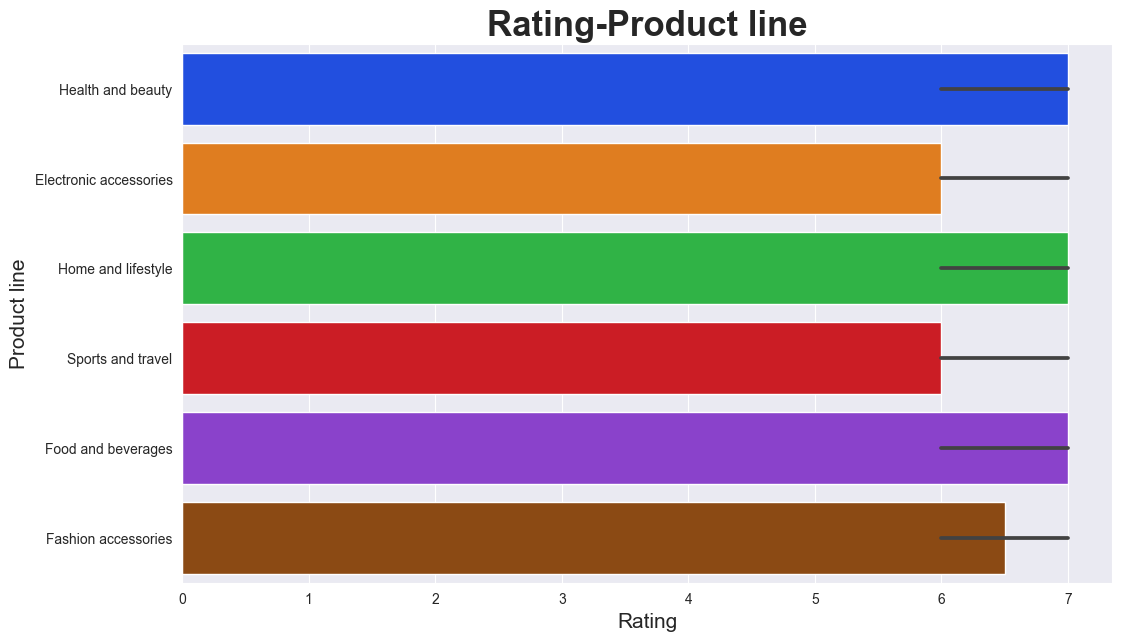

In [27]:
plt.figure(figsize=(12,7))
plt.xlabel("Rating",fontsize=15)
plt.ylabel("Product line",fontsize=15)
sns.barplot(x='Rating',y="Product line",data=df,palette='bright',estimator=np.median).set_title('Rating-Product line',fontsize=25,fontdict={"weight": "bold"})

In [28]:
# Analyze each branch
gb=df.groupby('City')
yangon_df=gb.get_group("Yangon")
Naypyitaw_df=gb.get_group("Naypyitaw")
Mandalay_df=gb.get_group("Mandalay")

In [29]:
# Yangon
yangon_df.groupby('Customer type').size()

Customer type
Member    167
Normal    173
dtype: int64

<Axes: xlabel='Customer type', ylabel='count'>

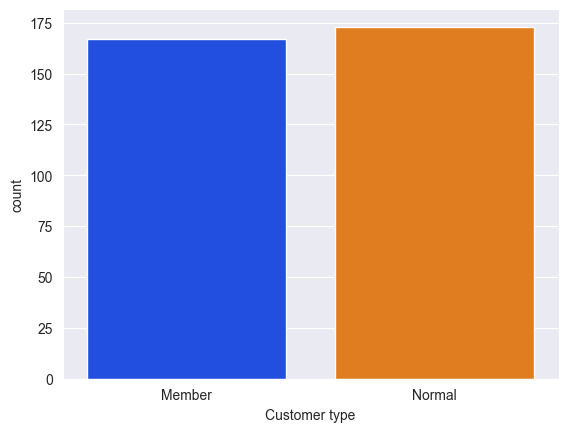

In [34]:
sns.countplot(x='Customer type',data=yangon_df,order=["Member","Normal"],palette='bright')

In [35]:
yangon_df.groupby('Gender').size()

Gender
Female    161
Male      179
dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

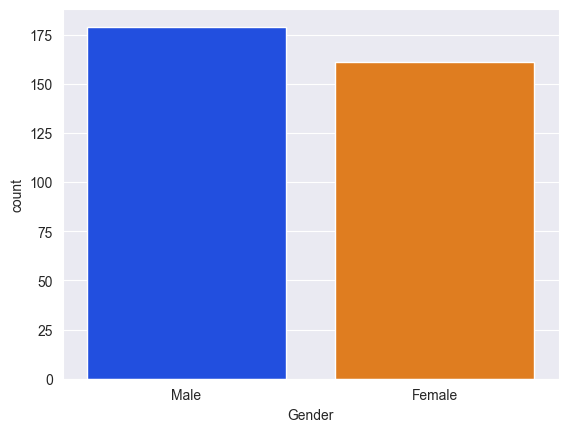

In [36]:
sns.countplot(x='Gender',data=yangon_df,order=['Male','Female'],palette='bright')

In [37]:
yangon_df.groupby(['Customer type', 'Gender']).size()

Customer type  Gender
Member         Female    80
               Male      87
Normal         Female    81
               Male      92
dtype: int64

<Axes: xlabel='Customer type', ylabel='Total'>

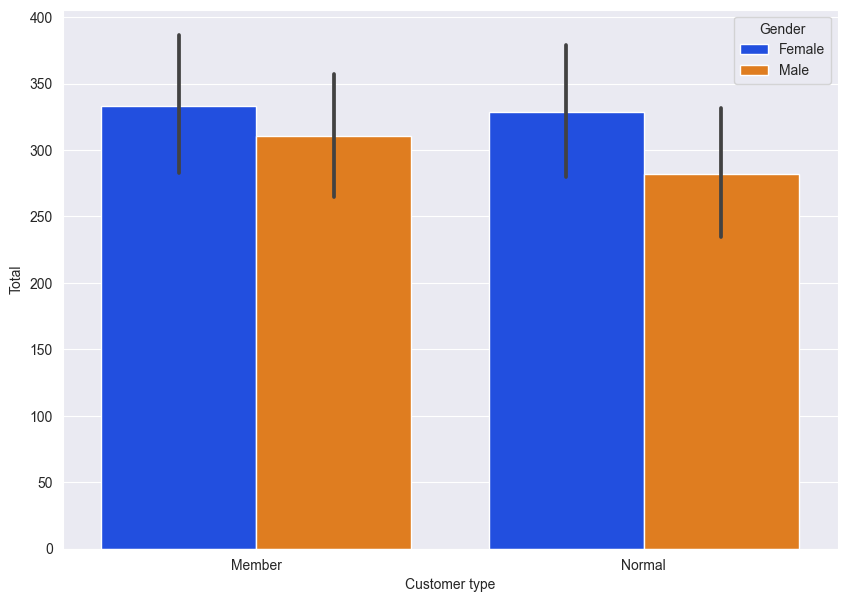

In [38]:
#average sales

plt.figure(figsize=(10,7))
sns.barplot(x="Customer type",y='Total',hue="Gender",data=yangon_df,palette='bright')

In [39]:
yangon_df.groupby('Payment').size().sort_values(ascending=False)

Payment
Ewallet        126
Cash           110
Credit card    104
dtype: int64

Text(0.5, 1.0, 'Payment Method')

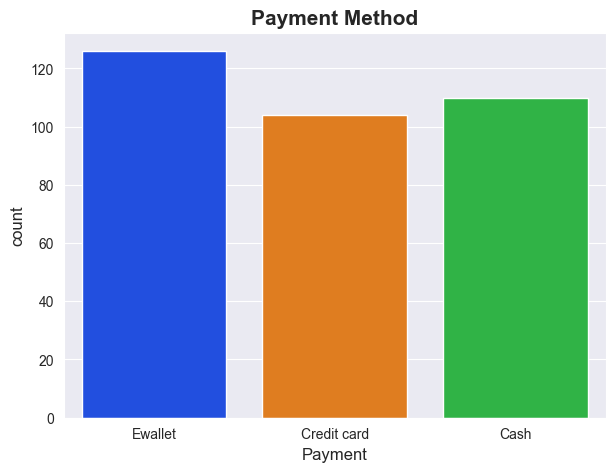

In [40]:
plt.figure(figsize=(7,5))
plt.xlabel("Payment",fontsize=12)
plt.ylabel("Count",fontsize=12)
sns.countplot(x='Payment',data=yangon_df,palette='bright').set_title("Payment Method",fontsize=15,fontdict={"weight": "bold"}) 

In [41]:
yangon_df['Total'].groupby(yangon_df['Product line']).sum().sort_values(ascending=False)

Product line
Home and lifestyle        22417.1955
Sports and travel         19372.6995
Electronic accessories    18317.1135
Food and beverages        17163.1005
Fashion accessories       16332.5085
Health and beauty         12597.7530
Name: Total, dtype: float64

Text(0.5, 1.0, 'Total Sales (Yangon)')

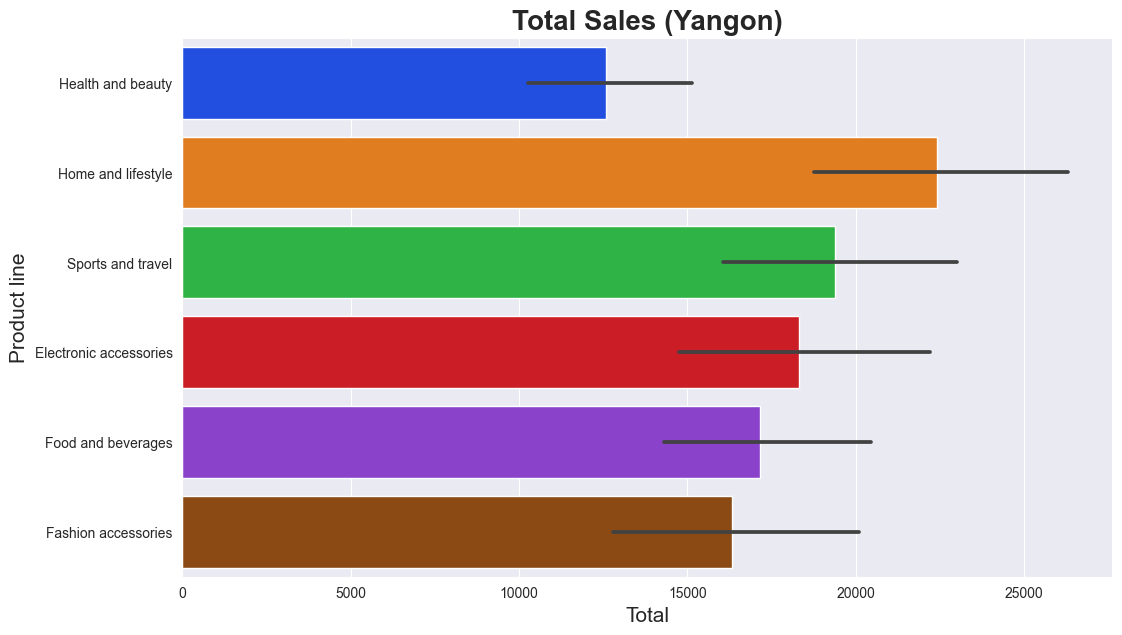

In [42]:
plt.figure(figsize=(12,7))
plt.xlabel("Total",fontsize=15)
plt.ylabel("Product line",fontsize=15)
sns.barplot(x='Total',y="Product line",data=yangon_df,palette='bright',estimator=sum).set_title('Total Sales (Yangon)',fontsize=20,fontdict={"weight": "bold"}) 

In [43]:
yangon_df['Quantity'].groupby(yangon_df['Product line']).sum().sort_values(ascending=False)

Product line
Home and lifestyle        371
Sports and travel         333
Electronic accessories    322
Food and beverages        313
Fashion accessories       263
Health and beauty         257
Name: Quantity, dtype: int64

Text(0.5, 1.0, 'Quantity Sales (Yangon)')

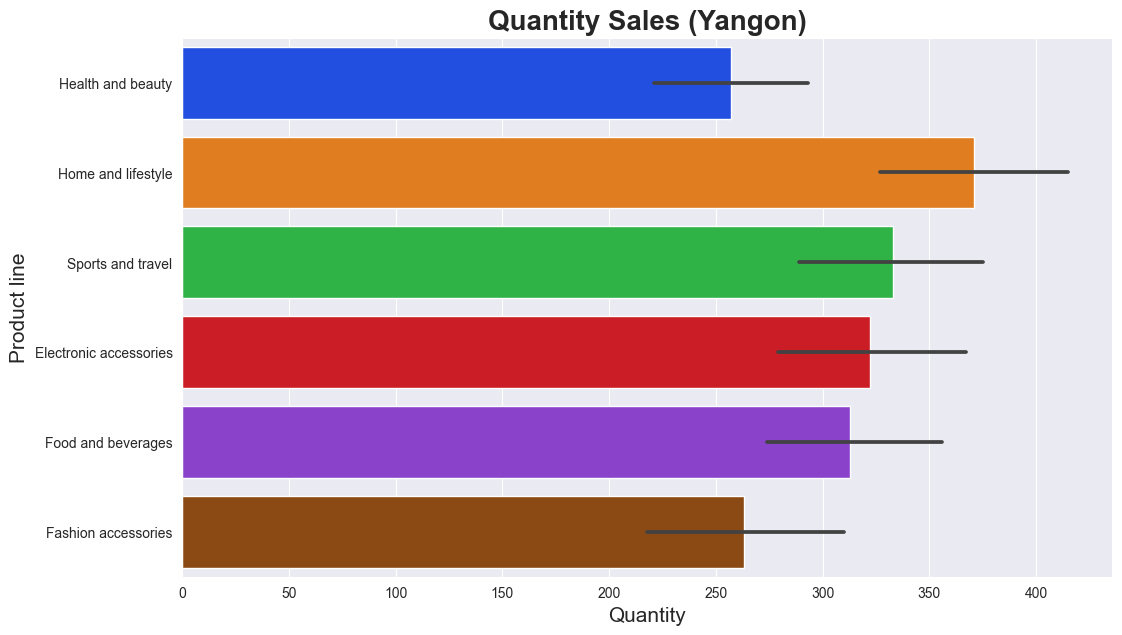

In [44]:
plt.figure(figsize=(12,7))
plt.xlabel("Total",fontsize=15)
plt.ylabel("Product line",fontsize=15)
sns.barplot(x='Quantity',y="Product line",data=yangon_df,palette='bright',estimator=sum).set_title('Quantity Sales (Yangon)',fontsize=20,fontdict={"weight": "bold"})

In [45]:
yangon_df.groupby(['Gender', 'Customer type', 'Product line']).size().sort_values(ascending=False)

Gender  Customer type  Product line          
Male    Member         Electronic accessories    19
                       Food and beverages        19
        Normal         Sports and travel         19
        Member         Home and lifestyle        18
Female  Member         Sports and travel         18
        Normal         Electronic accessories    16
                       Fashion accessories       16
                       Home and lifestyle        16
Male    Normal         Health and beauty         16
                       Food and beverages        16
Female  Member         Home and lifestyle        16
Male    Normal         Home and lifestyle        15
Female  Normal         Food and beverages        13
Male    Normal         Fashion accessories       13
                       Electronic accessories    13
Female  Member         Health and beauty         12
                       Electronic accessories    12
                       Fashion accessories       12
Male    Member    

In [46]:
yangon_df['Total'].groupby(yangon_df['Hour']).sum().sort_values(ascending=False)

Hour
11    11349.8910
15    11273.7030
10    11208.4140
16    10869.7365
13    10443.7515
19    10330.2570
12     9485.0700
17     9043.7340
14     8852.4135
18     7447.0200
20     5896.3800
Name: Total, dtype: float64

Text(0.5, 1.0, 'Sale Hour (Yangon)')

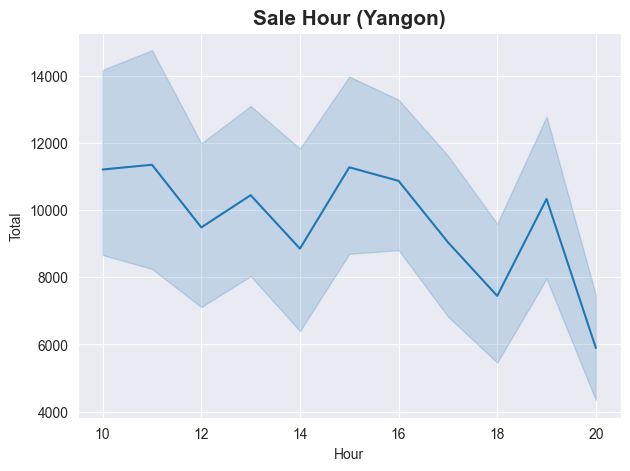

In [47]:
plt.figure(figsize=(7,5))
sns.lineplot(x=yangon_df['Hour'],y='Total',data=yangon_df,estimator=sum).set_title("Sale Hour (Yangon)",fontsize=15,fontdict={"weight": "bold"})

In [48]:
yangon_df['Quantity'].groupby(yangon_df['Hour']).sum().sort_values(ascending=False)

Hour
15    193
10    192
12    186
11    185
13    183
16    182
19    172
18    162
17    158
20    125
14    121
Name: Quantity, dtype: int64

Text(0.5, 1.0, 'Quantity Sales (Yangon)')

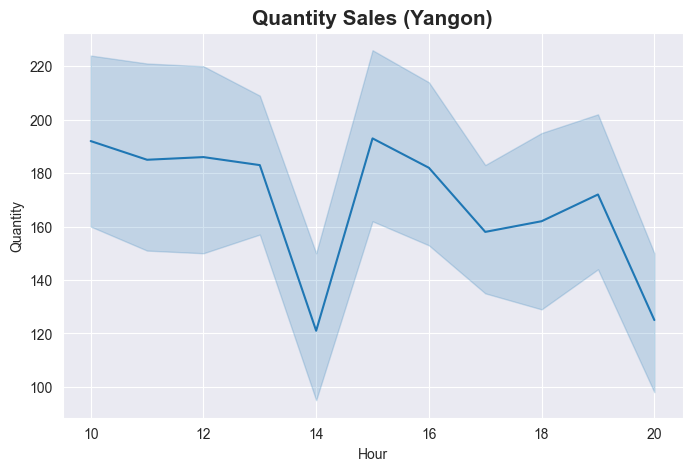

In [49]:
plt.figure(figsize=(8,5))
sns.lineplot(x=yangon_df['Hour'],y='Quantity',data=yangon_df,estimator=sum).set_title("Quantity Sales (Yangon)",fontsize=15,fontdict={"weight":"bold"})

In [50]:
yangon_df['Rating'].value_counts()

Rating
7     67
9     61
6     55
5     54
4     52
8     50
10     1
Name: count, dtype: int64

Text(0.5, 1.0, 'Rating-Count')

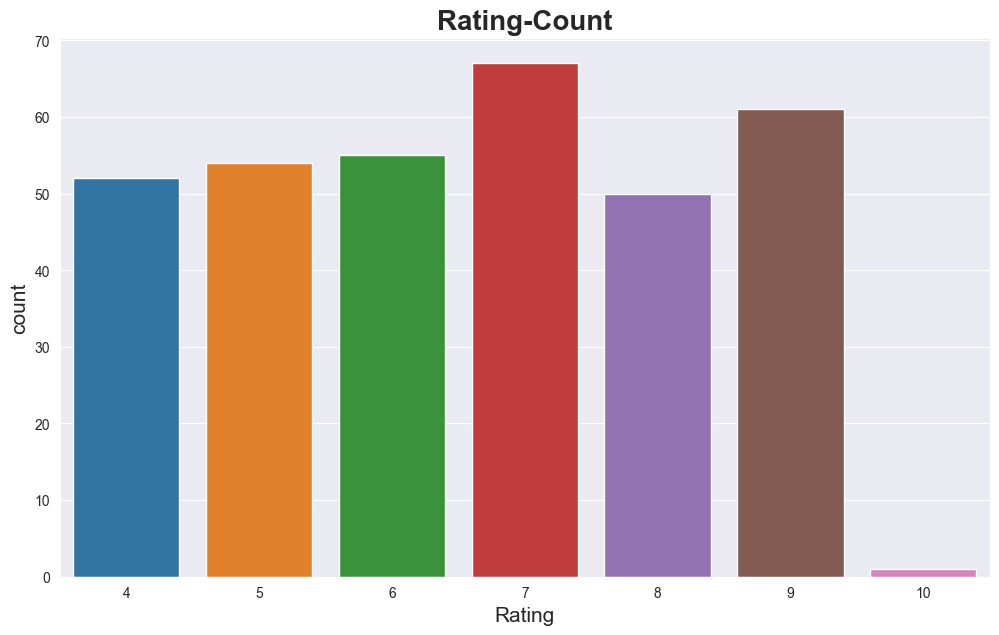

In [54]:
plt.figure(figsize=(12,7))
plt.xlabel("Rating",fontsize=15)
plt.ylabel("Count",fontsize=15)
sns.countplot(x=yangon_df["Rating"],data=yangon_df).set_title('Rating-Count',fontsize=20,fontdict={"weight": "bold"})

In [52]:
yangon_df['Rating'].groupby(yangon_df['Product line']).median().sort_values(ascending=False)

Product line
Fashion accessories       7.0
Food and beverages        7.0
Home and lifestyle        7.0
Sports and travel         7.0
Electronic accessories    6.0
Health and beauty         6.0
Name: Rating, dtype: float64

Text(0.5, 1.0, 'Rating-Product line (Yangon)')

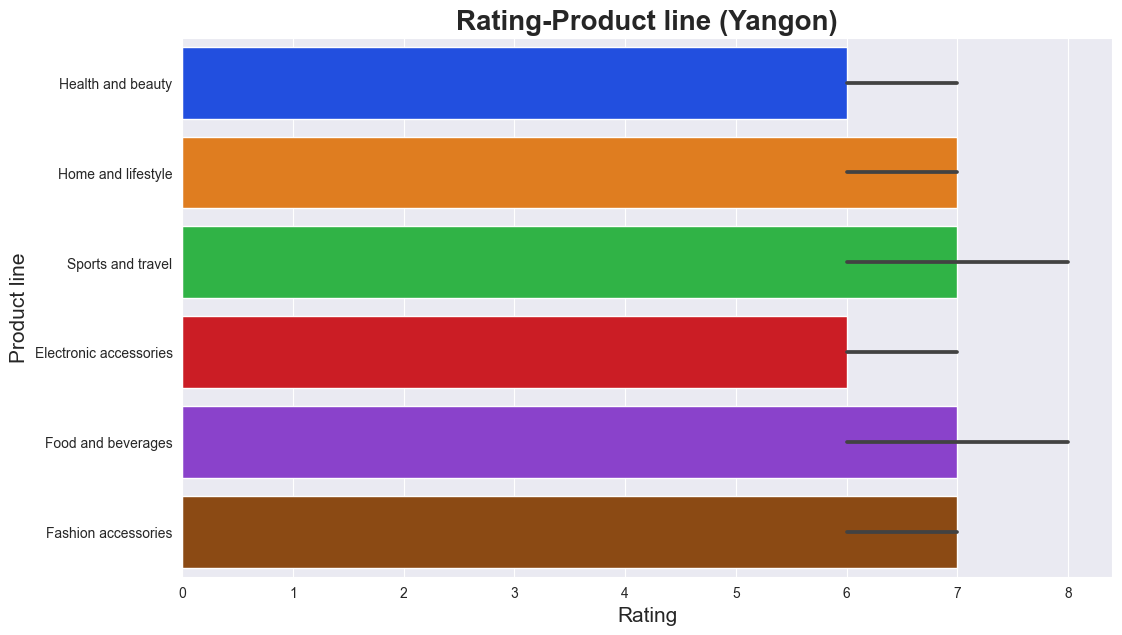

In [55]:
plt.figure(figsize=(12,7))
plt.xlabel("Rating",fontsize=15)
plt.ylabel("Product line",fontsize=15)
sns.barplot(x="Rating",y='Product line',data=yangon_df,palette='bright',estimator=np.median).set_title('Rating-Product line (Yangon)',fontsize=20,fontdict={"weight": "bold"})

In [56]:
yangon_df['Rating'].groupby(yangon_df['Product line']).median().sort_values(ascending=False)

Product line
Fashion accessories       7.0
Food and beverages        7.0
Home and lifestyle        7.0
Sports and travel         7.0
Electronic accessories    6.0
Health and beauty         6.0
Name: Rating, dtype: float64

Text(0.5, 1.0, 'Rating-Product line (Yangon)')

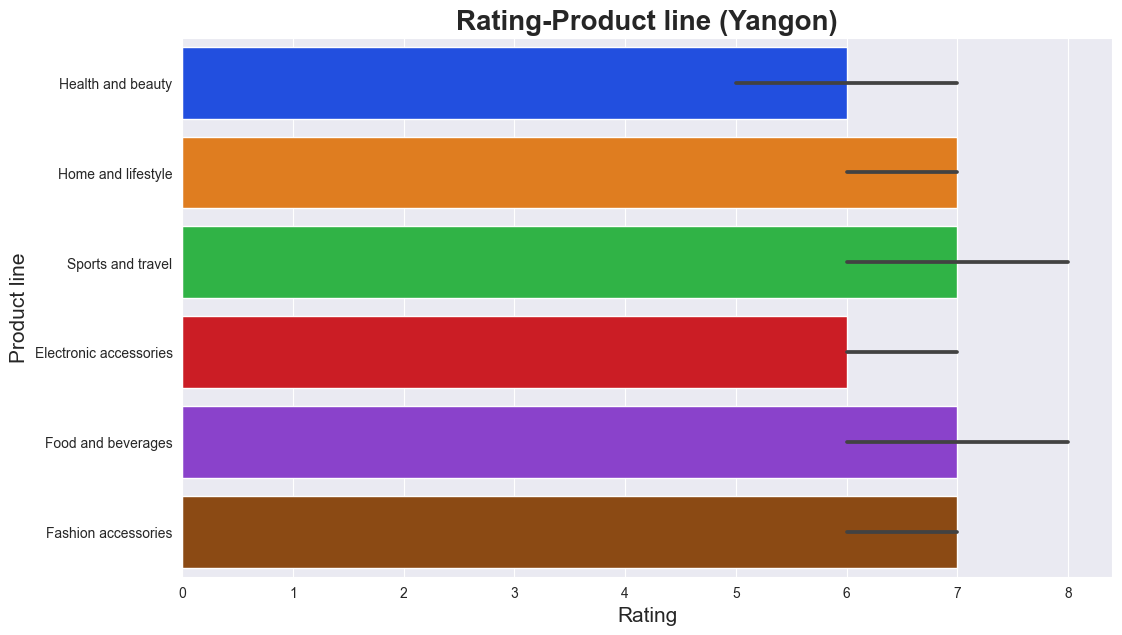

In [57]:
plt.figure(figsize=(12,7))
plt.xlabel("Rating",fontsize=15)
plt.ylabel("Product line",fontsize=15)
sns.barplot(x="Rating",y='Product line',data=yangon_df,palette='bright',estimator=np.median).set_title('Rating-Product line (Yangon)',fontsize=20,fontdict={"weight": "bold"})

In [ ]:
# Naypyitao
